<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.775685  47.011535  38.138000  0.283770  180.208990   
      1.0    20.061430  72.096093  92.628887 -0.529704  194.256707   
      2.0    50.129380  63.356287  88.867743  1.957192  214.310601   
      3.0    59.880835  80.277999  51.950266 -0.589524  201.519577   
      4.0    51.964837  35.731339  67.011186 -0.291676  164.415687   
...                ...        ...        ...       ...         ...   
999.0 115.0  71.465237  88.643698  95.775955 -0.870589  265.014301   
      116.0  73.921681  86.955143  49.513079  1.539758  221.929662   
      117.0  46.511390  79.631143  46.399735  0.903750  183.446019   
      118.0  85.942303  53.558417  56.319776 -8.000197  197.820300   
      119.0  58.022286  57.248923  34.341032  1.169530  160.781771   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.215770 -0.006780  
      1.0    194.197945  0.058762  
      2.0    212.145310  2.165291  
      3.0    202.137645 -0.618068  
      4.0    164.484916 -0.069229  
...                 ...       ...  
999.0 115.0  265.598101 -0.583800  
      116.0  220.412423  1.517239  
      117.0  182.637877  0.808142  
      118.0  205.844731 -8.024431  
      119.0  159.815372  0.966398  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.775685  47.011535  38.138000  0.283770  180.208990   
      1.0    20.061430  72.096093  92.628887 -0.529704  194.256707   
      2.0    50.129380  63.356287  88.867743  1.957192  214.310601   
      3.0    59.880835  80.277999  51.950266 -0.589524  201.519577   
      4.0    51.964837  35.731339  67.011186 -0.291676  164.415687   
...                ...        ...        ...       ...         ...   
999.0 115.0  71.465237  88.643698  95.775955 -0.870589  265.014301   
      116.0  73.921681  86.955143  49.513079  1.539758  221.929662   
      117.0  46.511390  79.631143  46.399735  0.903750  183.446019   
      118.0  85.942303  53.558417  56.319776 -8.000197  197.820300   
      119.0  58.022286  57.248923  34.341032  1.169530  160.781771   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.215770 -0.006780  
      1.0    194.197945  0.058762  
      2.0    212.145310  2.165291  
      3.0    202.137645 -0.618068  
      4.0    164.484916 -0.069229  
...                 ...       ...  
999.0 115.0  265.598101 -0.583800  
      116.0  220.412423  1.517239  
      117.0  182.637877  0.808142  
      118.0  205.844731 -8.024431  
      119.0  159.815372  0.966398  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.775685  47.011535  38.138000  0.283770  180.208990   
      1.0    20.061430  72.096093  92.628887 -0.529704  194.256707   
      2.0    50.129380  63.356287  88.867743  1.957192  214.310601   
      3.0    59.880835  80.277999  51.950266 -0.589524  201.519577   
      4.0    51.964837  35.731339  67.011186 -0.291676  164.415687   
...                ...        ...        ...       ...         ...   
999.0 115.0  71.465237  88.643698  95.775955 -0.870589  265.014301   
      116.0  73.921681  86.955143  49.513079  1.539758  221.929662   
      117.0  46.511390  79.631143  46.399735  0.903750  183.446019   
      118.0  85.942303  53.558417  56.319776 -8.000197  197.820300   
      119.0  58.022286  57.248923  34.341032  1.169530  160.781771   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.215770 -0.006780  
      1.0    194.197945  0.058762  
      2.0    212.145310  2.165291  
      3.0    202.137645 -0.618068  
      4.0    164.484916 -0.069229  
...                 ...       ...  
999.0 115.0  265.598101 -0.583800  
      116.0  220.412423  1.517239  
      117.0  182.637877  0.808142  
      118.0  205.844731 -8.024431  
      119.0  159.815372  0.966398  

[120000 rows x 7 columns]

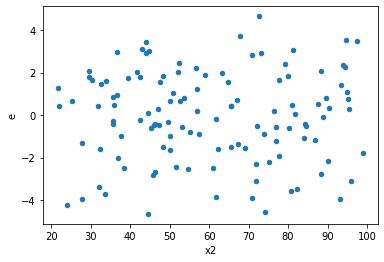

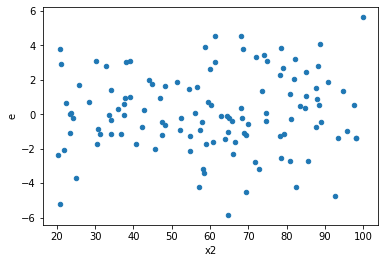

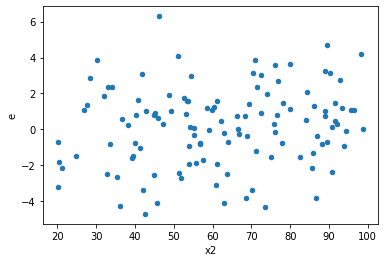

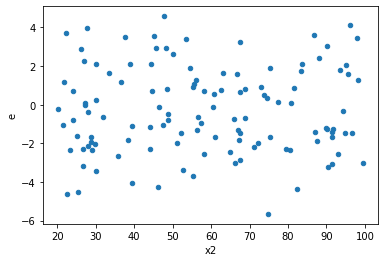

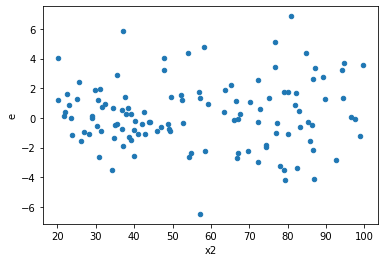

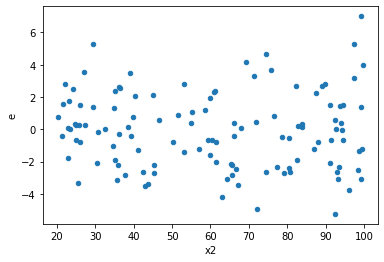

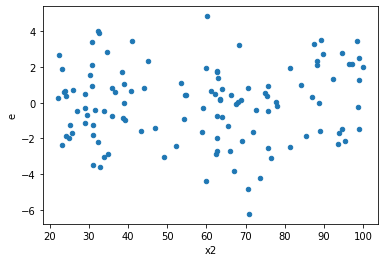

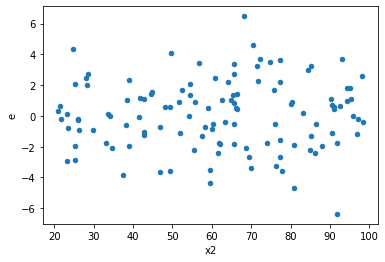

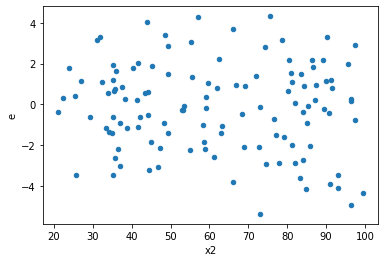

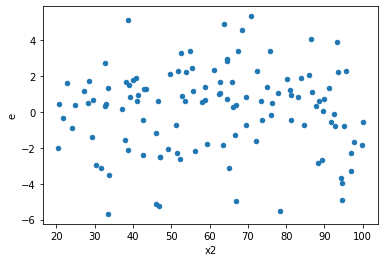

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,207.15139590518677,230.62695427190638,4.603364353448595,5.125043428264586,1.1133256103061182,0.7203522566310401,0.63982387168448,0.36017612831552004,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,210.5559802053412,305.0272471146989,4.679021782340915,6.7783832692155315,1.4486752967891305,0.21764375047709272,0.8911781247614536,0.10882187523854636,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,194.97907626466844,228.5621855758513,4.332868361437076,5.079159679463362,1.172239554902786,0.5962568468167191,0.7018715765916405,0.29812842340835954,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,191.5852374497291,263.839448736227,4.2574497211050915,5.863098860805044,1.3771387203330683,0.28681174232218787,0.8565941288389061,0.14340587116109393,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,191.47015962462743,294.1415786199863,4.254892436102832,6.536479524888585,1.5362267373497975,0.15368815658152846,0.9231559217092358,0.07684407829076423,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,204.4347128944109,217.62800706546255,4.542993619875798,4.836177934788057,1.064535489028548,0.8347747636701488,0.5826126181649256,0.4173873818350744,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,220.19970110951422,240.04525428652985,4.893326691322538,5.334338984145107,1.0901252502933492,0.7735102388028274,0.6132448805985863,0.3867551194014137,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,189.91030328350524,193.2632863661284,4.220228961855672,4.294739697025076,1.0176556143855855,0.9534487567450176,0.5232756216274912,0.4767243783725088,Reject005=1 : Homoscedasticity
9.0,45.0,45.0,234.4932176197242,289.62316794195465,5.210960391549427,6.436070398710103,1.2351025367890778,0.48164471390266606,0.759177643048667,0.24082235695133303,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,207.15139590518677,230.62695427190638,4.603364353448595,5.125043428264586,1.1133256103061182,0.7203522566310401,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,210.5559802053412,305.0272471146989,4.679021782340915,6.7783832692155315,1.4486752967891305,0.21764375047709272,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,211.04309359997927,173.49732675200667,4.6898465244439835,3.855496150044593,0.8220943116047259,0.513813812756551,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,194.97907626466844,228.5621855758513,4.332868361437076,5.079159679463362,1.172239554902786,0.5962568468167191,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,191.5852374497291,263.839448736227,4.2574497211050915,5.863098860805044,1.3771387203330683,0.28681174232218787,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,191.47015962462743,294.1415786199863,4.254892436102832,6.536479524888585,1.5362267373497975,0.15368815658152846,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,204.4347128944109,217.62800706546255,4.542993619875798,4.836177934788057,1.064535489028548,0.8347747636701488,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,220.19970110951422,240.04525428652985,4.893326691322538,5.334338984145107,1.0901252502933492,0.7735102388028274,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,189.91030328350524,193.2632863661284,4.220228961855672,4.294739697025076,1.0176556143855855,0.9534487567450176,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      906
Reject005=0 : Heteroscedasticity     94
Name: Result_test, dtype: int64